'Wp:'

c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local

'Ws:'

'Omegap:'

'Omegas:'

'n:'

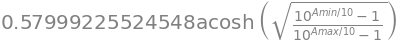

Low pass filter function


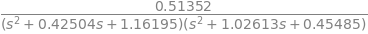



High Pass Filter function


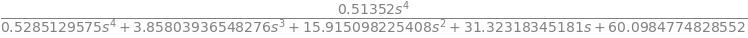

In [3]:
import tkinter as tk
import os

from sympy import symbols
from sympy import fraction, poly
from sympy import tan, acosh, sqrt, ceiling, I, Abs, atan, re, im
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from control.matlab import zero, pole, bode, tf
import numpy as np


from scipy.signal import freqz,freqs

import matplotlib.pyplot as plt


WIDTH, HEIGHT = 1000,562
SAMPLINGRATE = 128
AMOUNT = 2
ImageSize = 256
root = tk.Tk()
root.minsize(WIDTH, HEIGHT)
root.title("EERI 414 Practical:  IIR Digital high-pass filter")
BG = tk.PhotoImage(file = os.path.join("Images", "background.png"))
lblBG = tk.Label(root, image = BG)
lblBG.place(x = 0, y = 0)
root.configure(background = "navy")

def btnCreateClick():
    FT = 205000 #Hz
    FP = 80000 #Hz
    FS = 50000 #Hz
    AMAX = 0.25 #dB
    AMIN = 40 #dB
    PI = 3.141592653589792328462643383279502

    Ft, Fp, Fs, Amax, Amin, s = symbols('Ft Fp Fs Amax Amin s')


    #Convert to radians per seconds:
    Wp, Ws = symbols('Wp Ws')

    W_p = (2*PI*Fp)/Ft
    Wp = W_p.subs(Fp,FP).subs(Ft,FT)
    W_s = (2*PI*Fs)/Ft
    Ws = W_s.subs(Fs,FS).subs(Ft,FT)

    display("Wp:", Wp, "Ws:", Ws)

    #Pre-warp/normalise to Low Pass
    Omega_p, Omega_s = symbols('Omegap Omegas')

    Omega_dp = tan(Wp/2)
    Omega_ds = tan(Ws/2)
    Omega_p = Omega_ds
    Omega_s = Omega_dp

    display("Omegap:", Omega_p, "Omegas:", Omega_s)


    #Find order of filter

    n = (acosh(sqrt((10**(Amin/10)-1)/(10**(Amax/10)-1))))/(acosh(Omega_s/Omega_p))

    display("n:", n)

    nAnswer = n.subs([(Amax, AMAX), (Amin, AMIN), (Ft, FT), (Fp, FP), (Fs, FS)])

    display(nAnswer.evalf())
    display(ceiling(nAnswer.evalf()))

    Hlps_func = symbols('Hlps')

    Hlps_func = (0.51352)/((s*s + 0.42504*s + 1.16195) * (s*s + 1.02613*s + 0.45485)) #n=4

    print("Low pass filter function")
    display(Hlps_func)

    #Hhps = symbols('Hhps')
    #Substitute equation 10 into the transfer function
    Hhps = Hlps_func.subs(s, Omega_dp/s).subs(Fs, FS).subs(Ft, FT)
    print("\n\nHigh Pass Filter function")
    Hhps_ex = Hhps.expand()
    Hhps_sim = Hhps_ex.simplify()
    display(Hhps_sim)
    btncreate.config(state="disabled")

def btnAnalogClick():
    pass


def btnDigitalClick():
    pass


def btnRealizeClick():
    pass


def btnCompareClick():
    pass



       
btncreate = tk.Button(root, text = "Create filter",command=btnCreateClick)
btncreate.place(x=WIDTH*0.2,y=HEIGHT*0.1)

btnAnalog = tk.Button(root, text = "Analog domain",command=btnAnalogClick)
btnAnalog.place(x=WIDTH*0.2,y=HEIGHT*0.2)

btnDigital = tk.Button(root, text = "Digital domain",command=btnDigitalClick)
btnDigital.place(x=WIDTH*0.2,y=HEIGHT*0.3)

btnRealize = tk.Button(root, text = "Realize filter",command=btnRealizeClick)
btnRealize.place(x=WIDTH*0.2,y=HEIGHT*0.4)

btnCompare = tk.Button(root, text = "Input vs output of filter",command=btnCompareClick)
btnCompare.place(x=WIDTH*0.2,y=HEIGHT*0.5)



root.mainloop()
